## Głębokie sieci neuronowe - Miniprojekt końcowy
In this project, I created and trained a neural network to classify computer game covers from book covers.

For dataset used, I downloaded the covers from various sources and combined them together. I created the labels directly in the notebook.

In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
book_cover_paths = glob.glob(f"/content/drive/MyDrive/covers_dataset/books/*.png")
game_cover_paths = glob.glob(f"/content/drive/MyDrive/covers_dataset/games/*.png")

In [ ]:
print('Number of book cover samples: ', len(book_cover_paths))
print('Number of game cover samples: ', len(game_cover_paths))

Number of book cover samples:  1700
Number of game cover samples:  1700


This dataset contains images with different sizes, **It's important to remember that every image needs to be the same size in order to train neural network.** It will be done with usage of cv2 'resize' method.

Loaded images are also changed from BGR to RGB format.

In [ ]:
width = 130
height = 180
depth = 3

In [ ]:
X_games = np.stack([cv2.resize(cv2.cvtColor(cv2.imread(cover), cv2.COLOR_BGR2RGB), (width, height)) for cover in game_cover_paths])

In [ ]:
X_books = np.stack([cv2.resize(cv2.cvtColor(cv2.imread(cover), cv2.COLOR_BGR2RGB), (width, height)) for cover in book_cover_paths])

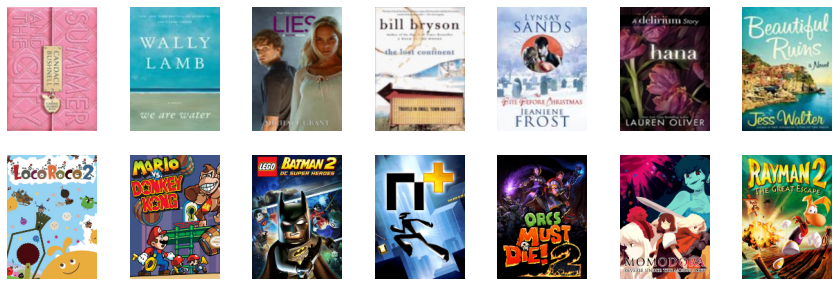

In [ ]:
plt.figure(figsize=(15, 5))

for i in range(7):
  plt.subplot(2, 7, i + 1)
  plt.imshow(X_books[i])
  plt.axis("off")

  plt.subplot(2, 7, i + 8)
  plt.imshow(X_games[i])
  plt.axis("off")

In [ ]:
print('First book sample shape: ', X_books[0].shape)
print('Second book sample shape: ', X_books[1].shape)
print('X_books shape: ', X_books.shape)

First book sample shape:  (180, 130, 3)
Second book sample shape:  (180, 130, 3)
X_books shape:  (1700, 180, 130, 3)


In [ ]:
print('First game cover sample shape: ', X_games[0].shape)
print('Second game sample shape: ', X_games[1].shape)
print('X_games shape: ', X_games.shape)

First game cover sample shape:  (180, 130, 3)
Second game sample shape:  (180, 130, 3)
X_games shape:  (1700, 180, 130, 3)


In [ ]:
y_books = np.array([0.0, 1.0] * len(X_books)).reshape((-1, 2))
y_games = np.array([1.0, 0.0] * len(X_games)).reshape((-1, 2))

X = np.concatenate((X_books, X_games), axis=0) / 255
y = np.concatenate((y_books, y_games), axis=0)

print(X.shape)
print(y.shape)

(3400, 180, 130, 3)
(3400, 2)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42, shuffle=True, stratify=y)

In [ ]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (2652, 180, 130, 3)
X_test shape:  (748, 180, 130, 3)
y_train shape:  (2652, 2)
y_test shape:  (748, 2)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(height, width, depth), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 29, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 14, 32)       0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=5,
    verbose=0,
    mode="auto",
    restore_best_weights=True,
)

In [ ]:
# Train model
history = model.fit(X_train, y_train,
                    batch_size=2,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
1326/1326 [==============================] - 27s 13ms/step - loss: 0.6984 - accuracy: 0.4747 - val_loss: 0.6923 - val_accuracy: 0.5214
Epoch 2/20
1326/1326 [==============================] - 18s 14ms/step - loss: 0.6996 - accuracy: 0.5611 - val_loss: 0.6581 - val_accuracy: 0.6818
Epoch 3/20
1326/1326 [==============================] - 17s 13ms/step - loss: 0.6433 - accuracy: 0.6554 - val_loss: 0.5070 - val_accuracy: 0.7807
Epoch 4/20
1326/1326 [==============================] - 17s 13ms/step - loss: 0.5312 - accuracy: 0.7511 - val_loss: 0.5511 - val_accuracy: 0.7433
Epoch 5/20
1326/1326 [==============================] - 17s 13ms/step - loss: 0.5131 - accuracy: 0.7809 - val_loss: 0.4707 - val_accuracy: 0.7767
Epoch 6/20
1326/1326 [==============================] - 17s 13ms/step - loss: 0.4641 - accuracy: 0.8100 - val_loss: 0.5011 - val_accuracy: 0.7941
Epoch 7/20
1326/1326 [==============================] - 17s 13ms/step - loss: 0.4375 - accuracy: 0.8216 - val_loss: 0.5008 -

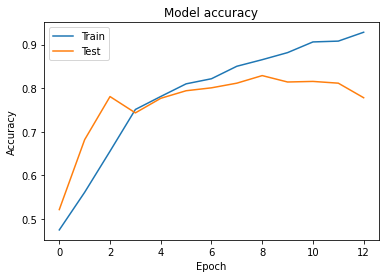

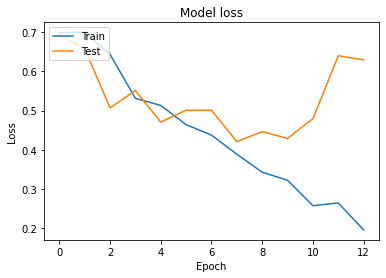

In [ ]:
# visualize training history 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Confusion matrix

In [ ]:
test_y_argmax = y_test.argmax(axis=1)

y_pred = model.predict(X_test)
y_pred_argmax = y_pred.argmax(axis=1)

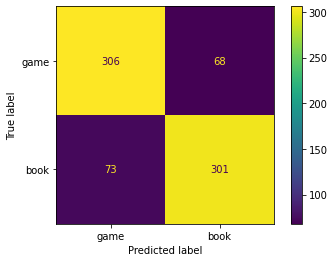

In [29]:
cm = confusion_matrix(test_y_argmax, y_pred_argmax)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['game', 'book']).plot()
plt.show()

## Summary
The model created in this notebook classified computer game covers from book covers with an accuracy of over 82% on the test set. Accuracy on the test set was over 92%. An important element in improving the prediction accuracy on the test set was the addition of a dropout layer after each of the dense layers, as there is a strong tendency for the training set to memorize each of the cover, not to generalize. I consider this a pretty good result considering how small the dataset was.
